In [14]:
import geopandas as gpd
import folium
import saxpy 
import pyproj
import substation_analysis_functions 
from imp import reload
reload(substation_analysis_functions)
from substation_analysis_functions import *


# keyboard shorctus
1. k to move up 
2. j to move down
3. a add a cell above
4. b add a cell below
5. ctrl enter - run without moving on
6. dd delete
7. shift + L  - enable line numbers

#  <font color = 'lightgreen'> Data Pre-Processing <font>

features

In [19]:
feature_of_interest = 'Active Power [kW]'

global_active_features = [
                f'Mean total daily load consumption {feature_of_interest}',
                f'Mean value of daily load pattern {feature_of_interest}',
                f'SD of daily load pattern {feature_of_interest}',
                f'Max power consumption during a day {feature_of_interest}',
                f'Min power consumption during a day {feature_of_interest}',
                f'Range of power consumption during a day (max - min) {feature_of_interest}',
                f'Percent values above mean val (%) {feature_of_interest}',
                f'Number of hours above 1.25 * mean val {feature_of_interest}',
                f'Number of hours below 0.75 * mean val {feature_of_interest}',
                f'Sum of net loads during business hours (9am-6pm) {feature_of_interest}',
                f'Sum of net loads during non-business hours {feature_of_interest}',
                f'Skewness of the distribution of a daily load pattern {feature_of_interest}',
                f'Kurtosis of distribution of a daily load pattern {feature_of_interest}',
                f'Mode of 5-bin histogram for daily load pattern {feature_of_interest}'
    ]
feature_of_interest = 'Reactive Power [kVAr]'

global_reactive_features = [
                f'Mean total daily load consumption {feature_of_interest}',
                f'Mean value of daily load pattern {feature_of_interest}',
                f'SD of daily load pattern {feature_of_interest}',
                f'Max power consumption during a day {feature_of_interest}',
                f'Min power consumption during a day {feature_of_interest}',
                f'Range of power consumption during a day (max - min) {feature_of_interest}',
                f'Percent values above mean val (%) {feature_of_interest}',
                f'Number of hours above 1.25 * mean val {feature_of_interest}',
                f'Number of hours below 0.75 * mean val {feature_of_interest}',
                f'Sum of net loads during business hours (9am-6pm) {feature_of_interest}',
                f'Sum of net loads during non-business hours {feature_of_interest}',
                f'Skewness of the distribution of a daily load pattern {feature_of_interest}',
                f'Kurtosis of distribution of a daily load pattern {feature_of_interest}',
                f'Mode of 5-bin histogram for daily load pattern {feature_of_interest}'
    ]

peak_features = ['Most common maximum Active Power [kW] peak time of day',
                'Most common minimum Active Power [kW] peak time of day',
                'Most common maximum Reactive Power [kVAr] peak time of day',
                'Most common minimum Reactive Power [kVAr] peak time of day']

active_and_reactive_features = global_active_features + global_reactive_features + peak_features

### <font color='lightgreen'> Read Data </font>

Substation 4626005100 Mill St flats POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626001300 Gloucester Green POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618007020 Hockmore Street POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626004180 osney mead pylon  POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4614005070 queens lane telephone exchange POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904001010 Swan mews POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618006160 minchery farm pumping station POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904024005 Dan Read Parade POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 46000

/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['Datetime'].dt.weekday
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['Datetime'].dt.weekday
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:103: 

Substation Mill St flats has only 12 days of data in fall weekend (<~1/2 of what should be there). Dropping from analysis.
Substation Gloucester Green has only 22 days of data in winter week (<~1/2 of what should be there). Dropping from analysis.
Substation Gloucester Green has only 9 days of data in winter weekend (<~1/2 of what should be there). Dropping from analysis.
Substation Hockmore Street has only 23 days of data in summer week (<~1/2 of what should be there). Dropping from analysis.
Substation Hockmore Street has only 9 days of data in summer weekend (<~1/2 of what should be there). Dropping from analysis.
Substation woodcroft has only 23 days of data in summer week (<~1/2 of what should be there). Dropping from analysis.
Substation woodcroft has only 9 days of data in summer weekend (<~1/2 of what should be there). Dropping from analysis.
Substation kennington church (cow lane) has only 0 days of data in spring week (<~1/2 of what should be there). Dropping from analysis.
S

/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'])
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Datetime'].dt.date
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:206: 

[0.9264 0.0592 0.0081 0.005  0.0007 0.0003 0.0001 0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


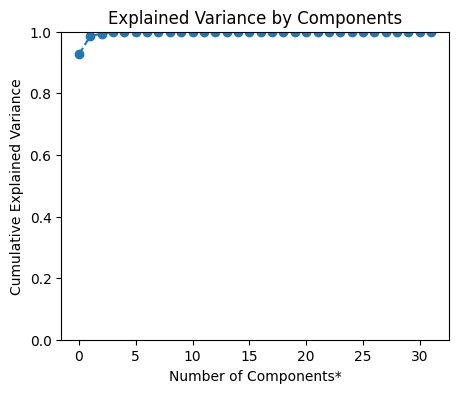

NameError: name 'df_dict' is not defined

In [20]:
##### Read data ######

folder_path = "../Substation Busbar Data/"
dataframes = substation_analysis_functions.read_substation_data(folder_path)

######################################################################################################
#################################### Data Cleaning ##############################################
######################################################################################################


##### Data Cleaning: Handle missing Vals and bad power vals ######

dataframes = substation_analysis_functions.handle_missing_vals(dataframes, threshold = 0.5)
for substation, df in dataframes.items():
    dataframes[substation] = substation_analysis_functions.detect_bad_power_vals(df,active_upper_threshold = 700, active_lower_threshold = 0, reactive_upper_threshold = 250, reactive_lower_threshold = -100)   
    
##### Data Transformation: Split dataset by season ######

substation_dataframes = {}
for substation, df in dataframes.items():
    spring, summer, fall, winter = substation_analysis_functions.split_by_season(df)
    substation_dataframes[substation] = {'spring': spring, 'summer': summer, 'fall': fall, 'winter': winter}

##### Data Transformation: Split dataset by time of week ######

chopped_substation_dfs = {}
for substation, season_dict in substation_dataframes.items():
    chopped_substation_dfs[substation] = {}
    for season, df in season_dict.items():
        week_df, weekend_df = substation_analysis_functions.split_weekend_week(df)
        chopped_substation_dfs[substation][season] = {}
        chopped_substation_dfs[substation][season]['week'] = week_df
        chopped_substation_dfs[substation][season]['weekend'] = weekend_df
        
        
##### Data Cleaning; Drop substations that don't have enough data in a time-of-week/season combo ######

chopped_substation_dfs = substation_analysis_functions.drop_underful_substations(chopped_substation_dfs)



######################################################################################################
#################################### Feature Extraction ##############################################
######################################################################################################



# Define the time period labels
time_labels = [1, 2, 3, 4, 5, 1]
#time_labels = ['night', 'morning', 'midday', 'afternoon', 'evening', 'night']

# Define the time period intervals
time_intervals = [(0, 5), (5, 11), (11, 14), (14, 17), (17, 22), (22, 24)]

features_dataframes = substation_analysis_functions.create_substation_features_dataframes(chopped_substation_dfs, time_labels, time_intervals)


df_dict = substation_analysis_functions.split_into_seasonal_dfs(features_dataframes, global_active_features, global_reactive_features, peak_features)
# Access the dataframes using a tuple of (time_of_week, season) as the key
spring_weekday_df = df_dict[("week", "spring")]
spring_weekend_df = df_dict[("weekend", "spring")]
summer_weekday_df = df_dict[("week", "summer")]
summer_weekend_df = df_dict[("weekend", "summer")]
fall_weekday_df = df_dict[("week", "fall")]
fall_weekend_df = df_dict[("weekend", "fall")]
winter_weekday_df = df_dict[("week", "winter")]
winter_weekend_df = df_dict[("weekend", "winter")]


######################################################################################################
#################################### Clustering Analysis #############################################
######################################################################################################

pca_cluster_results = substation_analysis_functions.implement_pca_clustering(df_dict)
    

## Exploratory plotting

<font color = 'lightgreen'> Data Cleaning - determine active and reactive power cutoffs</font>

In [ ]:
# Assume that the dictionary of dataframes is called "data"
# Concatenate all dataframes together into one big dataframe
hist_df = pd.concat(dataframes.values(), ignore_index=True)
print(hist_df['Active Power [kW]'].quantile(0.999), hist_df['Reactive Power [kVAr]'].quantile(0.999),hist_df['Reactive Power [kVAr]'].quantile(0.001))

for substation, df in dataframes.items():
    plt.hist(df['Reactive Power [kVAr]'], bins=200)
    plt.title("Reactive Power (kVAr) all substations all days")

plt.ylim(0,20)
plt.xlim(-199, 250)
plt.show()
for substation, df in dataframes.items():
    plt.hist(df['Active Power [kW]'], bins = 200)
    plt.title("Active Power (kW) all substations all days")
plt.ylim(0,20)
plt.xlim(-50, 750)
plt.show()

<font color = 'lightgreen'> Feature Correlation Matrix <font>

In [ ]:
substation_analysis_functions.plot_correlation_matrices(df_dict, global_active_features, global_reactive_features)

## <font color='pink'> Extract features using IFEEL (maybe pursue later) </font>

In [ ]:
df_test = dataframes['Gloucester lane tx 1']

# Drop all unneeded columns
df_test = df_test[['Active Power [kW]', 'Datetime']]

# Drop last row from df_test
df_test = df_test[:-1]

# create a new column with the date only
df_test['Date'] = df_test['Datetime'].dt.date

# create a new column with the hour of the day
df_test['Hour'] = df_test['Datetime'].dt.hour

# identify duplicate rows based on "Date" and "Hour" columns
duplicates = df_test[df_test.duplicated(['Date', 'Hour'], keep=False)]
# Drop duplicates
df_test = df_test.drop_duplicates(['Date', 'Hour'])

#df_test.drop_duplicates(subset=['Date', 'Hour'], keep='first', inplace=True)


# Transform data from long to wide, so that date is the index and each column is a different time



df_pivot = df_test.pivot(index = 'Date', columns= 'Hour', values = 'Active Power [kW]')

# display the result
# convert integer columns to string
df_pivot.columns = df_pivot.columns.astype(str)
# convert columns to strings with format '%H:%M:%S'
df_pivot.columns = [str(hour) + ':00:00' if len(hour) > 1 else '0' + str(hour) + ':00:00' for hour in df_pivot.columns ]

df_pivot.columns



In [ ]:
# This is a demonstration case, which shows how to use IFEEL to extract interpretable features of electricity loads.
# The test dataset at different time intervals can be downloaded from https://github.com/chacehoo/IFEEL/tree/main/Test_Data
# The downloaded datasets need to be placed under the current working directory.




# # Read the downloaded data
# # df_test = pd.read_csv("IFEEL_test_data_1month_1hour.csv", header=0,index_col=0, parse_dates=False 
 
 #df_test = pd.read_csv("IFEEL/Test_Data/IFEEL_test_data_1month_30mins.csv", header=0,index_col=0, parse_dates=False)
# # df_test = pd.read_csv("IFEEL_test_data_1month_2hours.csv", header=0,index_col=0, parse_dates=False)


from IFEEL import ifeel_transformation, ifeel_extraction


# You can check the names of all global and peak-period features here.
feature_name_global = ifeel_extraction.feature_name_global
feature_name_peak = ifeel_extraction.feature_name_peak

df_test = dataframes['Gloucester lane tx 1']

# Drop all unneeded columns
df_test = df_test[['Active Power [kW]', 'Datetime']]

# Drop last row from df_test
df_test = df_test[:-1]

# create a new column with the date only
df_test['Date'] = df_test['Datetime'].dt.date

# create a new column with the hour of the day
df_test['Hour'] = df_test['Datetime'].dt.hour

# identify duplicate rows based on "Date" and "Hour" columns
duplicates = df_test[df_test.duplicated(['Date', 'Hour'], keep=False)]
# Drop duplicates
df_test = df_test.drop_duplicates(['Date', 'Hour'])

#df_test.drop_duplicates(subset=['Date', 'Hour'], keep='first', inplace=True)


# Transform data from long to wide, so that date is the index and each column is a different time
df_pivot = df_test.pivot(index = 'Date', columns= 'Hour', values = 'Active Power [kW]')

# display the result
# convert integer columns to string
df_pivot.columns = df_pivot.columns.astype(str)

# convert columns to strings with format '%H:%M:%S'
df_pivot.columns = [str(hour) + ':00:00' if len(hour) > 1 else '0' + str(hour) + ':00:00' for hour in df_pivot.columns ]



sample_interval_in_hour = 24/df_pivot.shape[1]
# note: the value of sample interval is in the unit of hour, e.g., if the interval is 30 mins, then sample_interval = 0.5.

# Parameter setting
# Business hours here are from 9 am to 5 pm
time_business_start = 9
time_business_end = 17
alphabet_size = 7    # alphabet size of SAX representation

# Data transformation
[df_raw, df_raw_diff, df_SAX_number, df_SAX_alphabet, df_SAX_number_diff] = ifeel_transformation.feature_transformation(df_pivot, alphabet_size,time_business_start,time_business_end)


# Global feature extraction for each daily profile
feature_global_all_days = pd.DataFrame()
for i in np.arange(0, df_raw.shape[0]):
    ts = df_raw.iloc[i]
    ts_diff = df_raw_diff.iloc[i]
    feature_global_all_each = ifeel_extraction.feature_global(ts, ts_diff, sample_interval_in_hour).global_all().T
    feature_global_all_days = feature_global_all_days.append(feature_global_all_each, ignore_index=True)

feature_global_all_days.columns = ifeel_extraction.feature_name_global
feature_global_all_days.head()

# Peak feature extraction for each daily profile
feature_peak_period_all_days = pd.DataFrame()
for i in np.arange(0, df_raw.shape[0]):
    ts_sax = df_SAX_number.iloc[i]
    ts_sax_diff = df_SAX_number_diff.iloc[i]
    feature_peak_all_each = ifeel_extraction.feature_peak_period(ts_sax, ts_sax_diff,alphabet_size, sample_interval_in_hour).T
    feature_peak_period_all_days = feature_peak_period_all_days.append(feature_peak_all_each, ignore_index=True)

feature_peak_period_all_days.columns = ifeel_extraction.feature_name_peak
feature_global_all_days.head()

## <font color = 'lightgreen'> PCA + Clustering <font>

<font color = 'lightgreen'>  FUNCTION: Print and plot PCA results for each dataset to determine number of components to cluster on </font> 

<font color = 'lightgreen'> Implementation: Cluster on Principle Component Scores <font>

[0.9264 0.0592 0.0081 0.005  0.0007 0.0003 0.0001 0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


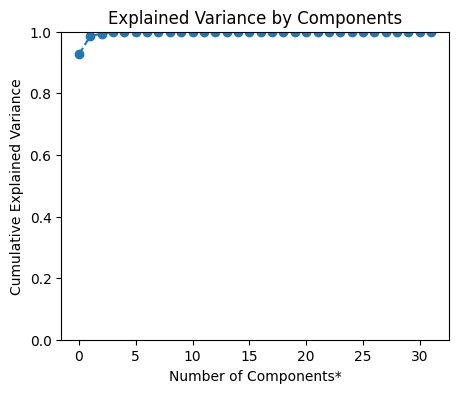

NameError: name 'df_dict' is not defined

In [ ]:
pca_cluster_results = substation_analysis_functions.implement_pca_clustering(df_dict)

## <font color ='lightgreen'> K Means Clustering (w/o PCA) + Analysis </font> <br>

<font color='lightgreen'> Implementation: K-Means Clustering 

Decide cluster number (k), present results 

</font>

In [ ]:
kmeans_dict = df_dict.copy()
kmeans_results = {}
kmeans_cluster_centers = {}
for feature_set in [False]:
    count = 0
    kmeans_results[feature_set] = {}
    kmeans_cluster_centers[feature_set] = {}
    for k,v in kmeans_dict:
        print(k,v)
        kmeans_dict[k,v], kmeans_results[feature_set][k,v] = substation_analysis_functions.k_means(df_dict[k,v], active_only = feature_set)


In [ ]:
# Write to csv
for k,v in kmeans_dict:
    to_write = kmeans_dict[k,v].loc[:, kmeans_dict[k,v].columns.str.contains('cluster|substation')]
    to_write.to_csv(f'../cluster_assignments/' + str(k) + '_' + str(v) + '_kmeans_cluster.csv')

<font color ='lightgreen'> Get feature statistics by cluster </font>

In [ ]:
# Create a dictionary to hold the relevant values of the features for each cluster for each season/time of week combo
df_stats_numeric = {}
df_stats_string = {}

# Choose k to work with 
k = 4

# Loop through df_dict 
for key in df_dict:
        
    # Group by chosen cluster number
    df_grouped = df_dict[key].groupby(f'cluster_{k}')
    
    # Calculate the mean of each feature for each cluster for all columns that have Active Power and Reactive Power in them
    df_mean = df_grouped.agg('mean')
    
    df_mode = df_grouped.agg(pd.Series.mode)
    
    # Save stats to dictionary
    df_stats_numeric[key] = df_mean
    df_stats_string[key] = df_mode
    
    # Write to csv (first filtering out the unwated columns)
    df_mean_to_write = round(df_mean.loc[:,~df_mean.columns.str.contains('cluster')],2)
    # df_mean_to_write.to_csv(f'../example_feature_sets/cluster_{k}_GF_vals_{key[0]}_{key[1]}.csv')
    
    df_mode_to_write = round(df_mode.loc[:,~df_mode.columns.str.contains('cluster')],2)
    df_mode_to_write = df_mode_to_write.loc[:,~df_mode_to_write.columns.str.contains('substation')] 
    df_mode_to_write = df_mode_to_write.loc[:,~df_mode_to_write.columns.str.contains('Percent')] 
    # df_mode_to_write.to_csv(f'../example_feature_sets/cluster_{k}_PF_vals_{key[0]}_{key[1]}.csv')
    print(df_mode_to_write.columns)
    
    df_to_write = df_mean_to_write.merge(df_mode_to_write, on = f'cluster_{k}', how = 'left')
    df_to_write.to_csv(f'../example_feature_sets/cluster_{k}_feature_vals_{key[0]}_{key[1]}.csv')
    




<font color ='lightgreen'> Get representative sample from each cluster <font>

In [ ]:
# Go thru all the season and time of week dataset combos
# In each one, Filter the dataset down to each cluster one at a time (range(1,num_clust+1))
# Pick a random substation from each cluster

num_clust = k

# Initialize dictionary to hold the filtered dataframes
representative_substations = {}

for k,v in df_dict: 
    representative_substations[k,v] = {}
    cluster_reps = []
    for cluster in range(0,num_clust):
        # Filter down to the cluster
        df = df_dict[k,v].loc[df_dict[k,v][f'cluster_{num_clust}'] == cluster]
        # Pick a random substation
        substation = df.sample(1)['substation'].values[0]
        # Filter down to the substation
        #this_cluster_rep = df.loc[df['substation'] == substation]
        # Append to the list of cluster reps (appends in order of cluster number)
        cluster_reps.append(substation)
    print(cluster_reps)
    
    
    
        # Save the df to a dictionary
    representative_substations[k,v] = cluster_reps
        # Save the df to a csv
      #  df.to_csv(f'example_feature_sets/cluster_{num_clust}_substation_{substation}_{k}_{v}.csv')
    

Get the median load profiles (or example load profile) for the representative substations
<font color = 'orange'> with error bars <font>

In [ ]:
for key in representative_substations:
    cluster_reps = representative_substations[key]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    plt.style.use('seaborn')
    # Plot all active power profiles
    for cluster_number, substation in enumerate(cluster_reps):
        print(cluster_number, substation)
        dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
        ax1.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation)
        ax1.set_title(f'Active Power Load Profiles for all Substations in {key[0]}, {key[1]}')
        ax1.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
        ax1.set_xlabel('Hour of the Day')
        ax1.set_ylabel('kW')
        ax1.set_ylim(0, 750)

    # Plot all reactive power profiles
    for cluster_number, substation in enumerate(cluster_reps):
        print(cluster_number, substation)
        dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
        ax2.plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').median(), label=substation)
        ax2.set_title(f'Reactive Power Load Profiles for all Substations in {key[0]}, {key[1]}')
        ax2.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
        ax2.set_xlabel('Hour of the Day')
        ax2.set_ylabel('kVAr')
        ax2.set_ylim(-50,110)
    
    # Save figure
    os.makedirs(f'../example_load_profiles/{key[0]}_{key[1]}', exist_ok = True)
    plt.tight_layout()
    plt.style.use('seaborn')
    plt.savefig(f'../example_load_profiles/{key[0]}_{key[1]}/all_ss_load_profiles.png', facecolor = 'white', edgecolor = 'black')
    plt.show()


In [ ]:
# num_clust = k
# for key in representative_substations:
#     if key == ('weekend', 'summer') or key == ('week', 'winter'):
#         print(key)
#         cluster_reps = representative_substations[key]
        
#         for cluster_number, substation in enumerate(cluster_reps):
#             print(cluster_number, substation)
#             dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
#             fig, ax = plt.subplots(2)
#             plt.style.use('seaborn')
#             # Main trendlines
#             ax[0].plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), color = 'blue')
#           #  ax[0].plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').mean(), color = 'blue')
#             ax[1].plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').median(), color = 'orange')
#           #  ax[1].plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').mean(), color = 'green')
            
#             # Error bars
#             ax[0].plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').max(), color = 'black', linestyle = 'dashed', alpha = 0.5)
#             ax[0].plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').min(), color = 'black', linestyle = 'dashed', alpha = 0.5)
#             ax[1].plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').max(), color = 'black', linestyle = 'dashed', alpha = 0.5)
#             ax[1].plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').min(), color = 'black', linestyle = 'dashed', alpha = 0.5)
            
#             # Title and Legend
#             ax[0].set_title(f'Active and Reactive Power Load Profiles for cluster {cluster_number + 1} in {key[0]}, {key[1]} \n {substation}')
#             ax[0].legend(labels= ['Median Active Power'])
#             ax[1].legend(labels= ['Median Reactive Power'])
            
#             # Axis labels
#             ax[0].set_xlabel('Hour of the Day')
#             ax[0].set_ylabel('kW')
#             ax[1].set_xlabel('Hour of the Day')
#             ax[1].set_ylabel('kVAr')
            
#             # Y-axis limits
#             ax[0].set_ylim(0, 750)
#             ax[1].set_ylim(-50,100)
            
#             ##for i in range(2):
#             #  ax[i].set_facecolor('white')
#               #ax[i].set_edgecolor('black')
#            #  ax[i].set_axis_bgcolor('white')
            
#           # Save figure
#           os.makedirs(f'../example_load_profiles/{key[0]}_{key[1]}', exist_ok = True)
#           plt.tight_layout()
#           plt.style.use('seaborn')
#           plt.savefig(f'../example_load_profiles/{key[0]}_{key[1]}/rep_ss_load_for_{cluster_number}_(out_of_{num_clust}_clusters).png', facecolor = 'white', edgecolor = 'black')
#           plt.show()
            
    
        
        
        
# ##### PSEUDO CODE #####
# # Go to the representative substation for each cluster and look at the time series data for that substation, from the 'dataframes' dictionary
# # Then get the average value of active power in each hour of the day for that substation
# # Plot that... 
        

## <font color = 'red' > Fuzzy C- Means (not needed) <font>

In [ ]:
import numpy as np
import skfuzzy as fuzz

def fuzzy_c_means(df, c_values = range(2,11), active_only = False, m=2.0, error=0.005, maxiter=1000):
    if active_only:
        # Get the feature set - only active power features
        X = df.loc[:, df.columns.str.contains('Active Power')].values
    else:
        # Get the feature set - all features
        X = df.loc[:, df.columns != 'substation'].values

    # Create an empty dict to hold cluster assignments for each c value
    results = {}

    # Loop through each value of c
    for c in c_values:
        # Apply fuzzy c-means clustering to the feature set
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c, m, error=error, maxiter=maxiter, init=None)
        # Calculate the cluster labels based on the maximum degree of membership
        labels = np.argmax(u, axis=0)
        # Assign cluster labels to substations
        df['cluster_{}'.format(c)] = labels
        # Save clustering results
        results[c] = labels
    
    return df, results

def fuzzy_c_means(df, c_values=range(2, 11), active_only=False, m=2, error=0.005, maxiter=1000):
    if active_only:
        X = df.loc[:, df.columns.str.contains('Active Power')].values
    else:
        X = df.loc[:, df.columns != 'substation'].values
    
    X = X.astype(float)  # Convert X to float dtype
    
    results = {}
    for c in c_values:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c, m, error=error, maxiter=maxiter, init=None)
        labels = np.argmax(u, axis=0)
        df['cluster_{}'.format(c)] = labels
        results[c] = labels
        
    return df, results



In [ ]:
cmeans_results = {}
for feature_set in [True, False]:
    count = 0
    cmeans_results[feature_set] = {}
    for k,v in df_dict:
        df_dict[k,v], cmeans_results[feature_set][k,v] = fuzzy_c_means(df_dict[k,v], active_only = feature_set)
    

## <font color = 'lightgreen'> GMM Clustering <Font>

In [ ]:
from sklearn.mixture import GaussianMixture

def gmm_clustering(df, n_components_range=range(1, 11), active_only=False):
    
    if active_only:
        # Get the feature set - only active power features
        X = df.loc[:, df.columns.str.contains('Active Power')].values
    else:
        # Get the feature set - all features
        X = df.loc[:, df.columns != 'substation'].values

    # Create an empty list to hold the BIC scores
    bic_scores = []
    
    # Create empty dict to hold results
    results = {}
    
    # Loop through each value of n_components
    for n_components in n_components_range:
        # Fit the GMM model to the feature set
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        # Calculate the BIC for the clustering
        bic_scores.append(gmm.bic(X))
        
        # Save clustering results
        results[n_components] = gmm.predict(X)
        
        # Assign cluster labels to substations
         # Assign cluster labels to substations
        df[f'gmm_cluster_{n_components}'] = gmm.predict(X)
        
    # Plot the BIC scores for each n_components value
    plt.plot(n_components_range, bic_scores)
    plt.xlabel('Number of components')
    plt.ylabel('BIC')
    plt.title('BIC for Gaussian Mixture Models')
    plt.show()
    
    return df, results, bic_scores.index(min(bic_scores)) +1 # +1 because index starts at 0



In [ ]:
gmm_results = {}
bic_scores={}
gmm_dict = df_dict.copy()
for feature_set in [True, False]:
    count = 0
    gmm_results[feature_set] = {}
    bic_scores[feature_set]={}
    for k,v in gmm_dict:
        print(k,v)
        gmm_dict[k,v], gmm_results[feature_set][k,v], bic_scores[feature_set][k,v] = gmm_clustering(df_dict[k,v], active_only = feature_set)
    


In [ ]:
gmm_dict[k,v]

In [ ]:
feature_set = True
for k,v in results[feature_set]:
    print(k,v )
    print(optimal_bic)
    optimal_bic = bic_scores[feature_set][k,v]
    this_df=  pd.DataFrame(gmm_dict[k,v])
    this_df = this_df.loc[:, this_df.columns.str.contains(f'gmm_cluster_{optimal_bic}|substation')]
    this_df.to_csv(f'gmm_results/{k}_{v}_gmm.csv', index=False)
    
  #  pd.DataFrame(results[feature_set][k,v][optimal_bic]).to_csv(f'gmm_results/{k}_{v}_gmm.csv', index=False)
    
    

## <font color='white'> Results </font>

In [ ]:
for k,v in results[True]:
    print(k,v, results[True][k,v])

In [ ]:
for k,v in results[True]:
    cluster_assignments = results[True][k,v]
    df = pd.DataFrame(cluster_assignments)
    df.to_csv(f'cluster_assignments/{k}_{v}.csv')
#     for num_clust, labels in cluster_assignments.items():
#         # Create dataframe where each column has the cluster assignments for each k value 
#         df[f'cluster_{num_clust}'] = labels
        
#         df = pd.DataFrame(labels, columns = ['labels']).sort_values(by ='labels')


# df.to_csv(f'cluster_assignments/{k}_{v}_numclust=_{num_clust}.csv')
#        # cluster_assignments.sort_values(by=['cluster_6']).to_csv(f'cluster_assignments/{k}_{v}.csv')
    

In [ ]:
#k = 5
for k,v in df_dict:
    print(k,v)
  #  df_dict[k,v][]
    cluster_assignments = df_dict[k,v][['substation', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10']]
   # print(np.array(cluster_assignments.sort_values(by=['cluster_6'])))
  #  cluster_assignments.sort_values(by=['cluster_6']).to_csv(f'cluster_assignments/{k}_{v}.csv')
    cluster_assignments.to_csv(f'cluster_assignments/{k}_{v}.csv')
    
    


## <font color = 'pink'> pk prd features (not used) </font>

Peak period features </br>

No. of peak periods  </br>
Occurrence time (starting time) of each peak period </br>
Shortest time interval between peaks if more than one peak exists  </br>
Duration of each peak  </br>
Occurrence time of longest peak period  </br>
Duration longest peak period  </br>
Upward slope of longest peak  </br>
Downward slope of the longest peak

In [ ]:

def find_peak_period_features(data, alphabet_size=3, window_size=30, threshold=0.2):
    """
    Identifies peak period features in a time series using Symbolic Aggregate Approximation (SAX).
    
    Parameters:
        - data: a list or numpy array containing the time series data
        - alphabet_size: the number of symbols to use in the SAX representation (default is 3)
        - window_size: the size of the sliding window to use (default is 30)
        - threshold: the threshold value used to identify peak periods (default is 0.2)
    
    Returns:
        - A list of tuples, where each tuple contains the start and end index of a peak period.
    """
    
    sax = SAX(wordSize=window_size//alphabet_size, alphabetSize=alphabet_size) # Initialize the SAX object
    
    # Transform the time series data into a SAX representation
    sax_data = sax.to_letter_rep(data)
    
    # Compute the frequencies of each symbol in the SAX representation
    freqs = [sax_data.count(sym) / len(sax_data) for sym in sax.get_symbols()]
    
    # Find the threshold value for identifying peak periods
    mean_freq = sum(freqs) / len(freqs)
    std_dev_freq = (sum((f - mean_freq)**2 for f in freqs) / len(freqs))**0.5
    peak_threshold = mean_freq + std_dev_freq * threshold
    
    # Find the indices of the start and end of each peak period
    peak_periods = []
    in_peak_period = False
    for i in range(len(sax_data)):
        if freqs[sax_data[i]] >= peak_threshold:
            if not in_peak_period:
                peak_start = i
                in_peak_period = True
        else:
            if in_peak_period:
                peak_periods.append((peak_start * window_size, i * window_size))
                in_peak_period = False
    
    if in_peak_period: # Handle the case where a peak period continues to the end of the data
        peak_periods.append((peak_start * window_size, len(data)))
    
    return peak_periods


In [ ]:
from tslearn.piecewise import SymbolicAggregateApproximation
import numpy as np

# Create a random time series
X = np.array(dataframes['76 Church Road']['Active Power [kW]'])

# Define the SAX transformation parameters
n_bins = 4
strategy = 'uniform'
window_size = 20

# Create the SAX object and transform the time series
sax = SymbolicAggregateApproximation(n_segments=5, alphabet_size_avg=n_bins)
X_sax = sax.fit_transform(X.reshape(1, -1))

# Print the transformed time series
print(X_sax)



In [ ]:


def sax(time_series, alphabet_size, n_segments):
    # Helper function to convert the time series into symbolic representations using SAX
    # Returns the symbolic representations
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(time_series.reshape(-1, 1))
    kmeans = KMeans(n_clusters=alphabet_size, random_state=0).fit(scaled_data)
    distances = np.min(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'), axis=1)
    thresholds = np.percentile(distances, np.linspace(0, 100, alphabet_size + 1)[1:-1])
    symbolic_representation = np.zeros(len(scaled_data))
    for i in range(1, alphabet_size):
        symbolic_representation[distances <= thresholds[i-1]] = i
    symbolic_representation = np.array_split(symbolic_representation, n_segments)
    symbolic_representation = [''.join([str(int(symbol)) for symbol in segment]) for segment in symbolic_representation]
    return symbolic_representation

# First, we need to group the data by day
grouped = substation_df.groupby(by=[substation_df['date'].dt.date])

# Next, we need to iterate through each day to convert the time series into symbolic representations using SAX
peak_periods = []
for date, group in grouped:
    symbolic_representation = sax(group['Active Power [kW]'].values, 5, 24)
    peak_periods.append({
        'date': date,
        'symbolic_representation': symbolic_representation,
    })

# Now we can extract the various peak period features from the symbolic representations
number_of_peak_periods = []
occurrence_time_of_peaks = []
shortest_time_interval_between_peaks = []
duration_of_peaks = []
occurrence_time_of_longest_peak = []
duration_longest_peak = []
for period in peak_periods:
    peaks = [i for i, symbol in enumerate(period['symbolic_representation']) if symbol.count('1') >= 4]
    if peaks:
        number_of_peak_periods.append(len(peaks))
        occurrence_time_of_peaks.append([substation_df[substation_df['date'].dt.date == period['date']].iloc[peak]['date'] for peak in peaks])
        shortest_time_interval_between_peaks.append(min
####

    shortest_interval = None
    for i in range(1, len(peaks)):
        interval = peaks[i] - peaks[i-1]
        if shortest_interval is None or interval < shortest_interval:
            shortest_interval = interval
    shortest_time_interval_between_peaks.append(shortest_interval)

    peak_durations = []
    for peak in peaks:
        start = peak
        end = peak
        while end < len(period['symbolic_representation']) - 1 and period['symbolic_representation'][end + 1] == '1':
            end += 1
        peak_durations.append(end - start + 1)
    duration_of_peaks.append(peak_durations)

    longest_peak_duration = 0
    longest_peak_occurrence = None
    for i, duration in enumerate(peak_durations):
        if duration > longest_peak_duration:
            longest_peak_duration = duration
            longest_peak_occurrence = occurrence_time_of_peaks[-1][i]
    occurrence_time_of_longest_peak.append(longest_peak_occurrence)
    duration_longest_peak.append(longest_peak_duration)

# To find the upward and downward slopes of the longest peak, we need to access the original time series data
upward_slope_longest_peak = []
downward_slope_longest_peak = []
for i, period in enumerate(peak_periods):
    date = period['date']
    group = substation_df[substation_df['date'].dt.date == date]
    longest_peak_start = group[group['date'] == occurrence_time_of_longest_peak[i]].index[0]
    longest_peak_end = longest_peak_start + duration_longest_peak[i] - 1
    longest_peak = group[longest_peak_start:longest_peak_end+1]['Active Power [kW]'].values
    upward_slope = (longest_peak[-1] - longest_peak[0]) / duration_longest_peak[i]
    downward_slope = (longest_peak[0] - longest_peak[-1]) / duration_longest_peak[i]
    upward_slope_longest_peak.append(upward_slope)
    downward_slope_longest_peak.append(downward_slope)


In [ ]:
# substation_df = df
# def find_peaks(power_series):
#     # Helper function to find the peaks in a time series
#     # Returns a list of indeces of peak hours, where peak is defined as an hour with higher active power than both the previous and next hour  
#     peaks = []
#     for i in range(1, len(power_series) - 1):
#         if power_series[i] > power_series[i-1] and power_series[i] > power_series[i+1]:
#             peaks.append(i)
#     return peaks

# # Group data by day
# grouped = substation_df.groupby(by=[substation_df['Date']])

# # Next, we need to iterate through each day to find the peak periods
# peak_periods = []
# for date, group in grouped:
#     peaks = find_peaks(group['Active Power [kW]'].values)
#     if peaks:
#         peak_periods.append({
#             'date': date,
#             'peaks': peaks,
#         })

# # Now we can extract the various features for each day
# number_of_peak_periods = [len(period['peaks']) for period in peak_periods]
# occurrence_time_of_peaks = [substation_df.iloc[period['peaks'][0]]['Date'] for period in peak_periods]
# duration_of_peaks = []
# longest_peak_duration = []
# longest_peak_start = []
# longest_peak_end = []
# longest_peak_upward_slope = []
# longest_peak_downward_slope = []
# for period in peak_periods:
#     peaks = period['peaks']
#     date = period['date']
#     peak_durations = [peaks[i+1] - peaks[i] for i in range(len(peaks) - 1)]
#     duration_of_peaks.append(peak_durations)
#     if peak_durations:
#         longest_peak_index = np.argmax(peak_durations)
#         longest_peak_start.append(substation_df.iloc[peaks[longest_peak_index]]['Date'])
#         longest_peak_end.append(substation_df.iloc[peaks[longest_peak_index + 1]]['Date'])
#         longest_peak_duration.append(peak_durations[longest_peak_index])
#         longest_peak_values = group['Active Power [kW]'].iloc[peaks[longest_peak_index]:peaks[longest_peak_index + 1] + 1].values
#         longest_peak_upward_slope.append(np.polyfit(range(len(longest_peak_values)), longest_peak_values, 1)[0])
#         longest_peak_downward_slope.append(np.polyfit(range(len(longest_peak_values[::-1])), longest_peak_values[::-1], 1)[0])
#     else:
#         longest_peak_duration.append(None)
#         longest_peak_start.append(None)
#         longest_peak_end.append(None)
#         longest_peak_upward_slope.append(None)
       




# daily_groups =df.groupby(['Date'])
# peak_hour = daily_groups['Active Power [kW]'].idxmax().map(lambda x: substation_data.loc[x, 'Hour'])
# peak_hour

# <font color='orange'> To-Do: </font>
0. Organize Jupyter notebook file-- put all the pre-processing in one cell <br> 
0b. Include MIN active power hour in the peak hour features   <font color = 'lightgreen'> done </font><br>
0c. Redefine and drop outlier observations <font color = 'lightgreen'> done </font><br>
1. Extract small set of features given by Elnaz <font color = 'lightgreen'> done </font><br>
2. Clustering on small set of features given by Elnaz <font color = 'lightgreen'> done </font><br>
3. Implement threshold min distance for substation assignment  <font color = 'lightgreen'> done </font><br>
4. Plot PCA clustering results on map and send to Elnaz/Scot  <font color = 'orange'> not needed yet </font><br>
5. Repeat step 4 with the KMeans-only clustering on the small set of features given by Elnaz <font color = 'lightgreen'> done </font><br>
6. Compare PCA clustering results with the Land Use statistics <font color = 'lightgreen'> done </font><br>
7. Compare K Means clustering results with the Land Use statistics <font color = 'lightgreen'> done </font><br>
8. Make a list of the decision parameters within the methodology, and a list of possible outcomes to frame discussion with elnaz <font color = 'orange'> IN PROGRESS BELOW <font>


idea: dbscan clustering with land use types, and then assign substations, and then check power profiles?

Decision parameters: <br>
1. Data cleaning - active and reactive power thresholds; splitting the dataset up into season/time-of-week combinations; threshold data requirement for dropping substations from the season/time-of-week subsets (these fall under the category of having enough clean data to determine clusters)
2. Feature extraction - which features do we extract; <font color = 'orange'> try using IFEEL? </font>
3. Clustering: PCA n-components; 

Outcomes: <br>
1. Use cluster labels to predict what distribution of consumers the substation serves
2. Compare 'goodness-of-clustering' index between PCA and K-means results (not super interesting)
3. 

# <font color = 'orange'> Plot results on map <font>

Read in substation location data

In [ ]:
substations = pd.read_csv('../substation_descriptive_data.csv')
substations['substation'] = substations['Substation Site']
substations = substations[['substation', 'Latitude', 'Longitude']]
substations.set_index('substation', inplace= True)
substations['Longitude'] = substations['Longitude'] * -1
substations


Join substation location data with substation clustering results

In [ ]:
saved_results = {}
for k,v in pca_cluster_results:
    df= pca_cluster_results[k,v]
    df.index = df.index.str.lower().str.strip() # so that the dataframe indeces match up with the substations dataframe
    substations.index = substations.index.str.lower().str.strip()
    saved_results[k,v] = df.join(substations)


### Folium plot

In [ ]:
df = df[df['Latitude'].isna() == False]
df['Longitude'] = -1 * df['Longitude']
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)
for index, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], 
                  popup=f"{index}, Cluster: {row['Cluster']}",
                  icon=folium.Icon(color='red' if row['Cluster'] == 1 else 'blue' if row['Cluster'] == 2 else 'green')
                 ).add_to(m)

m.save('../maps/pca_clusters_k=5_week_summer.html')
m

### Shapefile based plot

In [ ]:



# Set the directory where the shapefiles are stored
dir_path = '../OS OpenMap Local (ESRI Shape File) SU/data/'

# Create an empty GeoDataFrame to hold the merged data
merged_gdf = gpd.GeoDataFrame()
count = 0
# Loop through all files in the directory with the .shp extension
for filename in os.listdir(dir_path):
    if filename.endswith('.shp'):
        count +=1
        print(count)
        # Read in the shapefile as a GeoDataFrame
        gdf = gpd.read_file(os.path.join(dir_path, filename))
        
        # Append the GeoDataFrame to the merged data
        merged_gdf = merged_gdf.append(gdf, ignore_index=True)
        



        
dir_path = '../OS OpenMap Local (ESRI Shape File) SP/data/'
for filename in os.listdir(dir_path):
    if filename.endswith('.shp'):
        count +=1
        print(count)
        # Read in the shapefile as a GeoDataFrame
        gdf = gpd.read_file(os.path.join(dir_path, filename))
        
        # Append the GeoDataFrame to the merged data
        merged_gdf = merged_gdf.append(gdf, ignore_index=True)
        

# # Convert your data to a geodataframe
# geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
# geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# # Make sure the CRS matches
# geo_df.crs = map_df.crs

# # Plot the map and data
# fig, ax = plt.subplots(figsize=(10, 10))
# map_df.plot(ax=ax, alpha=0.4, color='grey')
# geo_df.plot(ax=ax, markersize=2, color='red', marker='o')
# plt.show()


In [ ]:
merged_gdf.plot()

# <font color ='lightgreen'> Combine Consumer Type Data with Substation Data <font>

In [ ]:
substations = pd.read_csv('../substation_descriptive_data.csv')
substations['substation'] = substations['Substation Site']
substations = substations[['substation', 'Latitude', 'Longitude']]
substations.set_index('substation', inplace= True)
substations['Longitude'] = substations['Longitude'] * -1
substations


In [ ]:
consumer_data = pd.read_csv('../Dancing_types.csv')
consumer_data['Land Uses'] = consumer_data['LANDUSEDES']
# Define the projection of the input coordinates (OSGB36)
input_proj = pyproj.Proj(init='epsg:27700')

# Define the projection of the output coordinates (WGS84)
output_proj = pyproj.Proj(init='epsg:4326')

# Transform the coordinates
consumer_data['Longitude'], consumer_data['Latitude'] = pyproj.transform(input_proj, output_proj, consumer_data['X'], consumer_data['Y'])
consumer_data = consumer_data[['Longitude', 'Latitude', 'Land Uses']]
consumer_data.head(5)



Assign Consumers to Substations based on location



In [ ]:
def find_nearest_substation(df1, df2, threshold_distance):
    """
    Given two dataframes, df1 with columns ['Latitude', Longitude'] and an index 'Substation',
    and df2 with columns ['Land Uses', 'Latitude', 'Longitude'], returns a dataframe with
    columns ['Land Uses', 'Latitude', 'Longitude', 'Nearest Substation'], where
    'Nearest Substation' is the index of the nearest substation in df1 for each 'Land Uses'
    observation.
    """
    # calculate distances between all pairs of coordinates
    distances = cdist(df1[['Latitude', 'Longitude']], df2[['Latitude', 'Longitude']])

    # find the nearest substation for each 'Land Use' observation
    nearest_substations = df1.index[np.argmin(distances, axis=0)]
    nearest_substation_distances = np.min(distances, axis=0)

    # add 'Nearest Substation' column to df2
    df2['substation'] = nearest_substations
    df2['Nearest Substation Distance'] = nearest_substation_distances
    df2 = df2[df2['Nearest Substation Distance'] < threshold_distance] # only keep observations within threshold distance (km) of a substation

    df_count = pd.crosstab(index=df2['substation'], columns=df2['Land Uses'], normalize = 'index')

    
    return df2, df_count
result_df = pd.DataFrame()
result_df, df_count = find_nearest_substation(substations, consumer_data, threshold_distance = 1)
df_count.to_csv('../consumer_data_counts_by_substation.csv')

In [ ]:
# Check distribution of land uses in each substation
for idx, row in pd.crosstab(index=result_df['substation'], columns=result_df['Land Uses'], normalize = 'index').iterrows():
    if row['Residential'] < 0.6:
        row.plot(kind = 'bar')
        plt.show()

## Assign cluster labels to substations in the result_df, so that land use type between clusters can be compared

### K Means

In [ ]:
# df_dict_kmeans = df_dict.copy()

In [ ]:
def assign_cluster_labels_to_substations(df_dict, result_df):
    # create an empty dictionary to store the result dataframes
    result_dict = {}

    # iterate through the dictionary of dataframes
    for key, df in df_dict.items():
        temp_result_df = result_df.copy()
        # drop all columns except 'substation' and columns containing the string 'cluster'
        df = df.loc[:, ['substation'] + list(df.filter(like='cluster').columns)]
        # join the dataframe with 'result_df' on the column 'substation'
        temp_result_df = pd.merge(df, temp_result_df, on='substation')
        
        # save the joined dataframe in 'result_dict' with the same key
        result_dict[key] = temp_result_df
        del temp_result_df 
    return result_dict

result_dict = assign_cluster_labels_to_substations(df_dict_kmeans, result_df)

In [ ]:
# Iterate through result_dict
for key, df in result_dict.items():
    print(f"\n{key}")
    pd.crosstab(df['cluster_4'], df['Land Uses'], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, figsize = (10, 5))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #another way to plot
    # #df.groupby('cluster_4')['Land Uses'].value_counts(normalize=True).reset_index(name='proportion').plot(kind='bar', x='Land Uses', y='proportion', figsize=(10, 5))

    plt.show()

In [ ]:
result_dict[key].groupby(['substation', 'Land Uses', 'cluster_4']).size()

### PCA

In [ ]:
def assign_cluster_labels_to_substations_pca(df_dict, result_df):
    # create an empty dictionary to store the result dataframes
    result_dict = {}

    # iterate through the dictionary of dataframes
    for key, df in df_dict.items():
        temp_result_df = result_df.copy()
        # drop all columns except 'substation' and columns containing the string 'cluster'
        df = df.loc[:, list(df.filter(like='cluster').columns)]
        # join the dataframe with 'result_df' on the column 'substation'
        temp_result_df = pd.merge(df, temp_result_df, on='substation')
        
        # save the joined dataframe in 'result_dict' with the same key
        result_dict[key] = temp_result_df
        del temp_result_df 
    return result_dict

result_dict_pca = assign_cluster_labels_to_substations(pca_cluster_results, result_df)

In [ ]:
# Iterate through result_dict
for key, df in result_dict_pca.items():
    print(f"\n{key}")
    pd.crosstab(df['PCA_clustering_k=2'], df['Land Uses'], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, figsize = (10, 5))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #another way to plot
    # #df.groupby('cluster_4')['Land Uses'].value_counts(normalize=True).reset_index(name='proportion').plot(kind='bar', x='Land Uses', y='proportion', figsize=(10, 5))

    plt.show()